In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [379]:
mouse = '4139224.3'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
805,4139224.3,18_10_2018,1,TwoTower_noTimeout,61,1,CA1,2018-10-18,G:\My Drive\VR_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
807,4139224.3,18_10_2018,3,TwoTower_noTimeout,41,1,CA1,2018-10-18,G:\My Drive\VR_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
841,4139224.3,20_10_2018,2,TwoTower_noTimeout,60,1,CA1,2018-10-20,G:\My Drive\VR_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...
879,4139224.3,23_10_2018,1,TwoTower_Timeout,48,1,CA1,2018-10-23,G:\My Drive\VR_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...
909,4139224.3,25_10_2018,1,TwoTower_Timeout,69,1,,2018-10-25,G:\My Drive\VR_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...
933,4139224.3,26_10_2018,3,TwoTower_Timeout,72,1,CA1,2018-10-26,G:\My Drive\VR_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...
949,4139224.3,27_10_2018,4,TwoTower_Timeout,67,1,CA1,2018-10-27,G:\My Drive\VR_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...
959,4139224.3,29_10_2018,1,TwoTower_Timeout,71,1,CA1,2018-10-29,G:\My Drive\VR_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...
970,4139224.3,30_10_2018,1,TwoTower_Timeout,78,1,CA1,2018-10-30,G:\My Drive\VR_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...
983,4139224.3,31_10_2018,2,TwoTower_Timeout,66,1,CA1,2018-10-31,G:\My Drive\VR_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...


In [393]:
sess = df_mouse.iloc[5]
print(sess['data file'])

G:\My Drive\VR_Data\TwoTower\4139224.3\26_10_2018\TwoTower_Timeout_3.sqlite


In [394]:
VRDat,C, S, A = pp.load_scan_sess(sess)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)


num aberrant ttls 0.0
(31376,) (31376, 20) 99274


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:279: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [395]:
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,speed=VRDat.speed._values)
S_trial_mat[np.isnan(S_trial_mat)]=0


In [396]:
print(S.shape)

(31376, 2094)


In [397]:
effMorph = trial_info['morphs'] +  trial_info['wallJitter']
msort = np.argsort(effMorph)


In [398]:
masks, FR, SI = pc.place_cells_calc(S, VRDat['pos']._values,trial_info,
                        VRDat['tstart']._values, VRDat['teleport']._values,
                        method='bootstrap',correct_only=False,speed=VRDat.speed._values,
                        win_trial_perm=True)

start bootstrap
end bootstrap


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:98: RuntimeWarning: Mean of empty slice
  frmap[i] = np.nanmean(C[(position>edge1) & (position<=edge2),:],axis=0)


start bootstrap
end bootstrap


In [399]:
pc_mask = masks[0] | masks[1]

In [400]:
S_pc = S_trial_mat[:,:,:] #pc_mask]
nanmask = 1-np.isnan(S_pc)

In [401]:
S_tmat = sp.stats.zscore(np.reshape(S_pc[msort,:,:],[S_trial_mat.shape[0],-1]),axis=-1)
nanmask = np.reshape(nanmask,[S_trial_mat.shape[0],-1])

In [402]:
print(nanmask)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [403]:
S_t_rmat = np.matmul(S_tmat,S_tmat.T)/np.matmul(nanmask,nanmask.T)

In [404]:
print(S_t_rmat.shape)

(90, 90)


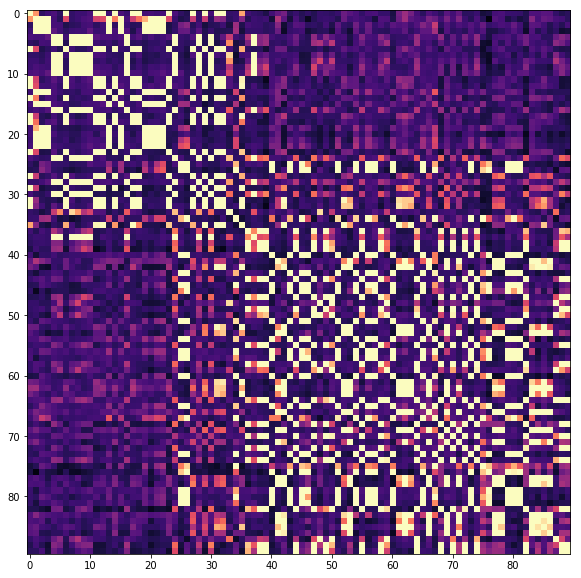

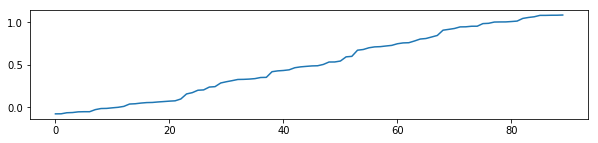

In [405]:
f,ax = plt.subplots(figsize=[10,10])
ax.imshow(S_t_rmat,cmap='magma',vmin=0,vmax=.2)
f,ax = plt.subplots(figsize=[10,2])
ax.plot(effMorph[msort])

In [347]:
w,v = np.linalg.eig(S_t_rmat)

In [348]:
print(rmat_eig.shape)

(120, 3)


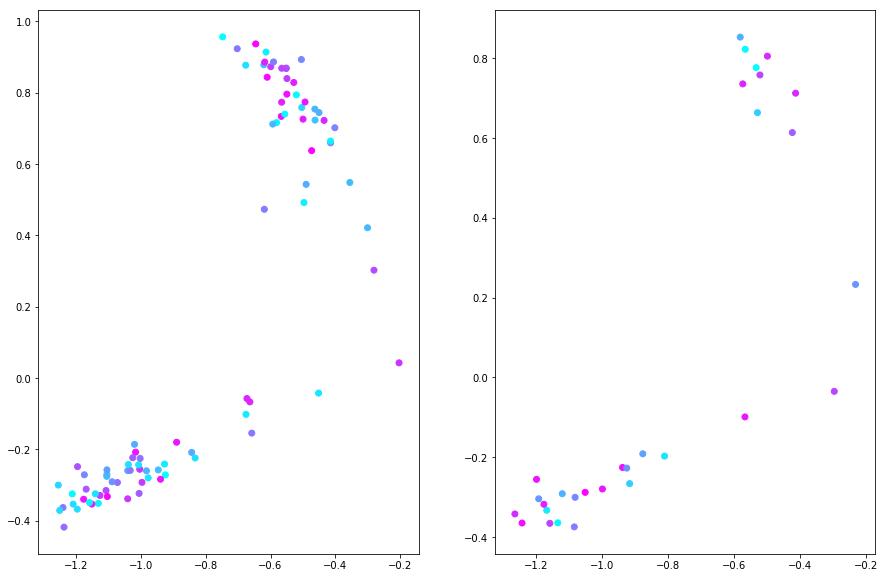

In [349]:
rmask = trial_info['rewards']>0
f,ax = plt.subplots(1,2,figsize=[15,10])
ax[0].scatter(rmat_eig[rmask,0],rmat_eig[rmask,1],c=effMorph[rmask],cmap='cool')
ax[1].scatter(rmat_eig[~rmask,0],rmat_eig[~rmask,1],c=effMorph[~rmask],cmap='cool')

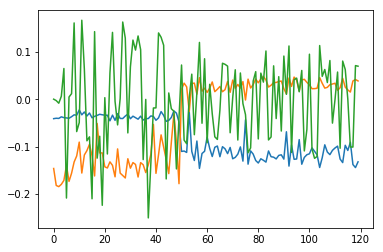

In [350]:
f,ax = plt.subplots()
ax.plot(v[:,0])
ax.plot(v[:,1])
ax.plot(v[:,2])

In [333]:
import sklearn as sk
import sklearn.cluster as clust
